<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging </h1>

In [9]:
import dataAnalysis as da
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
pds.set_option('display.max_colwidth', -1)
da.init()

C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


Initialization...
	Preparing corpus fr.foot.test.json...
	Done
	Preparing corpus fr.ftb.dev.json...
	Done
	Preparing corpus fr.ftb.test.json...
	Done
	Preparing corpus fr.ftb.train.json...
	Done
	Preparing corpus fr.gsd.dev.json...
	Done
	Preparing corpus fr.gsd.test.json...
	Done
	Preparing corpus fr.gsd.train.json...
	Done
	Preparing corpus fr.natdis.test.json...
	Done
	Preparing corpus fr.partut.dev.json...
	Done
	Preparing corpus fr.partut.test.json...
	Done
	Preparing corpus fr.partut.train.json...
	Done
	Preparing corpus fr.pud.test.json...
	Done
	Preparing corpus fr.pud.train.json...
	Done
	Preparing corpus fr.sequoia.dev.json...
	Done
	Preparing corpus fr.sequoia.test.json...
	Done
	Preparing corpus fr.sequoia.train.json...
	Done
	Preparing corpus fr.spoken.dev.json...
	Done
	Preparing corpus fr.spoken.test.json...
	Done
	Preparing corpus fr.spoken.train.json...
	Done
Done!


In [3]:
dataAnalyse = da.dataAnalysis()
names = da.getCorpusNames()
tweetDataSet = np.empty_like(names, dtype=bool)
tweetDataSet[0] = True
tweetDataSet[8] = True
corpusDesc = {
    "nom du corpus" : names,
    "Corpus de tweet": tweetDataSet,
    "exemple de phrases": dataAnalyse[0],
    "nombre de phrases" : dataAnalyse[1],
    "nombre d'éléments (mot, ponctuation, ..) dans le corpus": dataAnalyse[2],
    "nombre d'éléments unique (mot, ponctuation, ..) dans le corpus": dataAnalyse[3]
}
corpusDataFrame = pds.DataFrame(data=corpusDesc)
corpusDataFrame.sort_values("nom du corpus", axis = 0, ascending = True, inplace = True, na_position ='last')
corpusDataFrame

,nom du corpus,Corpus de tweet,exemple de phrases,nombre de phrases,"nombre d'éléments (mot, ponctuation, ..) dans le corpus","nombre d'éléments unique (mot, ponctuation, ..) dans le corpus"
0,fr.foot.test.json,True,"[Barça - Juventus sa seras du gâteau pour le Barça BARRRCA __EMOTICON__ __EMOTICON__ __EMOTICON__, Barça // Juventus , je sens Neymar il va mettre son doublé ., Barça B draw 1–1 with Racing , settle for insufficient point ✪ __URL__ __URL__]",743,13985,2638
1,fr.ftb.dev.json,True,"[Nous prions les cinéastes et tous nos lecteurs de bien vouloir nous en excuser ., La diffusion des prévisions météorologiques était fortement perturbée , mardi __DIGIT__ janvier , par le mouvement de grève nationale de trente - six heures déclenché la veille au soir , à l' appel des délégués CGT , CFDT et FO du personnel technique de Météo - France ., Par cette action , ces derniers veulent dénoncer la baisse des effectifs qui se traduit , affirment -ils , par "" l' abandon de certaines tâches et le recours à la sous - traitance "" .]",1235,38763,6545
2,fr.ftb.test.json,True,"[La limite des intérêts des emprunts contractés depuis le __DIGIT__ septembre __DIGIT__ pour l' acquisition d' un logement neuf ( intérêts déductibles des impôts à raison de __DIGIT__ % ) est fixée à 20 000 francs pour les personnes seules contre 15 000 francs précédemment et à 40 000 francs pour les couples mariés soumis à une imposition commune , contre 30 000 francs précédemment ., Dans le cas où le contribuable a des personnes à charge , le plafond prévu pour les célibataires ou les personnes seules sera majoré dans les mêmes conditions que pour les couples mariés : le relèvement des limites est de 2 000 francs pour les personnes à charge , cette majoration étant portée à 2 500 francs pour le deuxième enfant à 3 000 francs pour chaque enfant à partir du troisième ., Article __DIGIT__ de la loi de finances rectificative pour __DIGIT__ : affectation d' un logement à l' usage d' habitation principale .]",2541,75073,9845
3,fr.ftb.train.json,True,"[Certes , rien ne dit qu' une seconde motion de censure sur son projet de loi , reprenant l' accord du __DIGIT__ avril , n' aurait pas été la bonne mais cette probabilité , reconnaissent les socialistes , n' était pas la plus plausible ., Toujours est -il que le gouvernement a cédé alors que ses adversaires politiques ne proposent aucune solution alternative et considèrent , avec un bel ensemble , que la défense des intérêts des malades passe par le maintien d' un système qui aboutit à multiplier les actes inutiles et au dépassement généralisé des honoraires de la "" Sécu "" ., Du coup , il s' est incliné devant le corporatisme des représentants du corps médical ( qui traversent la même crise de représentativité que les syndicalistes du monde salarié ) , plus préoccupés par leurs rivalités internes que par les attentes des médecins à la recherche de règles du jeu claires et acceptables .]",14759,442228,27127
4,fr.gsd.dev.json,True,"[Aviator , un film sur la vie de Hughes ., Les études durent six ans mais leur contenu diffère donc selon les Facultés ., Mais comment faire dans un contexte structurellement raciste ?]",1476,34664,8964
5,fr.gsd.test.json,True,"[Je sens qu' entre ça et les films de médecins et scientifiques fous que nous avons déjà vus , nous pourrions emprunter un autre chemin pour l' origine ., On pourra toujours parler à propos d' Averroès de "" décentrement du Sujet "" ., « Il a été largement démontré que la population civile du territoire non autonome du Sahara occidental est l' objet de diverses atteintes aux droits humains , comme la détention arbitraire , les coups et les tortures » , écrit l' ONG internationale , implantée dans __DIGIT__ pays , citée par l' agence de presse sahraouie .]",416,9742,3172
6,fr.gsd.train.json,False,"[Les commotions cérébrales sont devenu si courantes dans ce sport qu' on les considére presque comme la routine ., L' œuvre est située dans la galerie des batailles , dans le chât

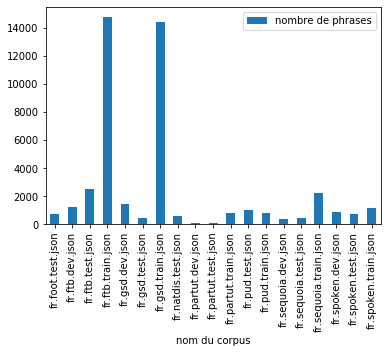

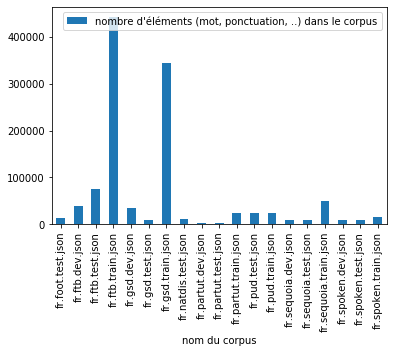

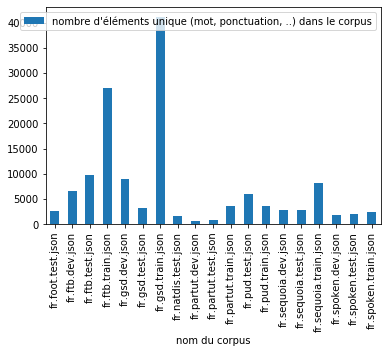

In [4]:
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre de phrases')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'éléments (mot, ponctuation, ..) dans le corpus')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'éléments unique (mot, ponctuation, ..) dans le corpus')

## Out of vocabulary words

Ce sont les mots qui apparaissent dans l'ensemble de test et pas dans l'ensemble d'apprentissage. Ainsi, 
plus le pourcentage est faible, plus l'ensemble de test et d'apprentissage ont un vocabulaire proche.
Inversement, un pourcentage élevé indique une grande différence entre le vocabulaires de l'ensemble
d'apprentissage et de l'ensemble de test.

On s'attend à avoir de meilleurs résultat lorsque le pourcentage est faible.

In [15]:
oovResult = da.computeOOV()
oovDataFrame = pds.DataFrame(data={"test corpus": oovResult[1],
                                   "OOV percentage": oovResult[2]},
                                    index=oovResult[0])

for corpus in da.listeCorpus:
    print("1")
    if corpus.name in oovDataFrame.index:
        print("2")
        subDF = oovDataFrame.loc[corpus.name,:]
        if len(subDF.index) > 2:
            subDF.sort_values("OOV percentage", axis = 0, ascending = True, inplace = True, na_position ='last')
        display(subDF)

1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.foot.test.json,fr.gsd.train.json,2.539465
fr.foot.test.json,fr.ftb.train.json,4.397783
fr.foot.test.json,fr.ftb.test.json,13.586478
fr.foot.test.json,fr.gsd.dev.json,14.790553
fr.foot.test.json,fr.sequoia.train.json,15.947519
fr.foot.test.json,fr.ftb.dev.json,19.721224
fr.foot.test.json,fr.pud.test.json,21.372368
fr.foot.test.json,fr.pud.train.json,31.794549
fr.foot.test.json,fr.partut.train.json,31.794549
fr.foot.test.json,fr.gsd.test.json,34.440620


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.ftb.dev.json,fr.ftb.train.json,3.198503
fr.ftb.dev.json,fr.gsd.train.json,3.460949
fr.ftb.dev.json,fr.ftb.test.json,16.540574
fr.ftb.dev.json,fr.sequoia.train.json,25.369993
fr.ftb.dev.json,fr.gsd.dev.json,25.475530
fr.ftb.dev.json,fr.pud.test.json,34.688023
fr.ftb.dev.json,fr.pud.train.json,45.513946
fr.ftb.dev.json,fr.partut.train.json,45.513946
fr.ftb.dev.json,fr.gsd.test.json,52.958732
fr.ftb.dev.json,fr.sequoia.test.json,54.716383


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.ftb.test.json,fr.ftb.train.json,5.606946
fr.ftb.test.json,fr.gsd.train.json,5.917474
fr.ftb.test.json,fr.gsd.dev.json,34.940720
fr.ftb.test.json,fr.sequoia.train.json,35.341098
fr.ftb.test.json,fr.pud.test.json,44.595874
fr.ftb.test.json,fr.partut.train.json,55.703113
fr.ftb.test.json,fr.pud.train.json,55.703113
fr.ftb.test.json,fr.gsd.test.json,62.618115
fr.ftb.test.json,fr.sequoia.test.json,64.596225
fr.ftb.test.json,fr.sequoia.dev.json,65.901536


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.ftb.train.json,fr.gsd.train.json,19.107318
fr.ftb.train.json,fr.gsd.dev.json,60.677177
fr.ftb.train.json,fr.sequoia.train.json,61.525827
fr.ftb.train.json,fr.pud.test.json,69.424406
fr.ftb.train.json,fr.partut.train.json,78.022441
fr.ftb.train.json,fr.pud.train.json,78.022441
fr.ftb.train.json,fr.gsd.test.json,81.741972
fr.ftb.train.json,fr.sequoia.test.json,83.021066
fr.ftb.train.json,fr.sequoia.dev.json,83.804653
fr.ftb.train.json,fr.spoken.train.json,85.058673


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.gsd.dev.json,fr.gsd.train.json,4.998401
fr.gsd.dev.json,fr.sequoia.train.json,35.442300
fr.gsd.dev.json,fr.pud.test.json,42.423838
fr.gsd.dev.json,fr.partut.train.json,56.411268
fr.gsd.dev.json,fr.pud.train.json,56.411268
fr.gsd.dev.json,fr.gsd.test.json,60.341134
fr.gsd.dev.json,fr.sequoia.test.json,63.696786
fr.gsd.dev.json,fr.sequoia.dev.json,64.953629
fr.gsd.dev.json,fr.spoken.train.json,67.119116
fr.gsd.dev.json,fr.spoken.test.json,72.432383


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.gsd.test.json,fr.gsd.train.json,1.279270
fr.gsd.test.json,fr.sequoia.train.json,14.378797
fr.gsd.test.json,fr.pud.test.json,19.681779
fr.gsd.test.json,fr.partut.train.json,30.402558
fr.gsd.test.json,fr.pud.train.json,30.402558
fr.gsd.test.json,fr.sequoia.test.json,38.103052
fr.gsd.test.json,fr.sequoia.dev.json,39.641000
fr.gsd.test.json,fr.spoken.train.json,41.466409
fr.gsd.test.json,fr.spoken.test.json,48.874224
fr.gsd.test.json,fr.spoken.dev.json,49.605211


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.gsd.train.json,fr.sequoia.train.json,71.851717
fr.gsd.train.json,fr.pud.test.json,77.425865
fr.gsd.train.json,fr.partut.train.json,84.794891
fr.gsd.train.json,fr.pud.train.json,84.794891
fr.gsd.train.json,fr.sequoia.test.json,88.225667
fr.gsd.train.json,fr.sequoia.dev.json,88.789585
fr.gsd.train.json,fr.spoken.train.json,89.578221
fr.gsd.train.json,fr.spoken.test.json,91.605500
fr.gsd.train.json,fr.spoken.dev.json,91.975050
fr.gsd.train.json,fr.natdis.test.json,93.588272


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.natdis.test.json,fr.sequoia.train.json,9.168704
fr.natdis.test.json,fr.pud.test.json,12.599869
fr.natdis.test.json,fr.partut.train.json,20.617978
fr.natdis.test.json,fr.pud.train.json,20.617978
fr.natdis.test.json,fr.sequoia.test.json,25.104327
fr.natdis.test.json,fr.sequoia.dev.json,27.058824
fr.natdis.test.json,fr.spoken.train.json,28.317308
fr.natdis.test.json,fr.spoken.test.json,33.951814
fr.natdis.test.json,fr.spoken.dev.json,35.092199
fr.natdis.test.json,fr.partut.test.json,57.686018


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.partut.dev.json,fr.sequoia.train.json,2.674157
fr.partut.dev.json,fr.pud.test.json,4.271469
fr.partut.dev.json,fr.partut.train.json,6.080470
fr.partut.dev.json,fr.pud.train.json,6.080470
fr.partut.dev.json,fr.sequoia.test.json,10.640638
fr.partut.dev.json,fr.sequoia.dev.json,11.472603
fr.partut.dev.json,fr.spoken.train.json,12.946979
fr.partut.dev.json,fr.spoken.test.json,17.328386
fr.partut.dev.json,fr.spoken.dev.json,18.359525
fr.partut.dev.json,fr.partut.test.json,32.418301


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.partut.test.json,fr.sequoia.train.json,2.466667
fr.partut.test.json,fr.pud.test.json,4.898079
fr.partut.test.json,fr.partut.train.json,4.995579
fr.partut.test.json,fr.pud.train.json,4.995579
fr.partut.test.json,fr.sequoia.test.json,11.078405
fr.partut.test.json,fr.sequoia.dev.json,11.736959
fr.partut.test.json,fr.spoken.train.json,15.281100
fr.partut.test.json,fr.spoken.test.json,19.069767
fr.partut.test.json,fr.spoken.dev.json,20.487265


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.partut.train.json,fr.pud.train.json,0.000000
fr.partut.train.json,fr.sequoia.train.json,13.687574
fr.partut.train.json,fr.pud.test.json,21.280758
fr.partut.train.json,fr.sequoia.test.json,39.119288
fr.partut.train.json,fr.sequoia.dev.json,40.304709
fr.partut.train.json,fr.spoken.train.json,44.838089
fr.partut.train.json,fr.spoken.test.json,51.678678
fr.partut.train.json,fr.spoken.dev.json,53.203641


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.pud.test.json,fr.sequoia.train.json,24.751568
fr.pud.test.json,fr.pud.train.json,44.908885
fr.pud.test.json,fr.sequoia.test.json,53.786691
fr.pud.test.json,fr.sequoia.dev.json,55.157512
fr.pud.test.json,fr.spoken.train.json,57.295207
fr.pud.test.json,fr.spoken.test.json,63.577154
fr.pud.test.json,fr.spoken.dev.json,64.725247


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.pud.train.json,fr.sequoia.train.json,13.687574
fr.pud.train.json,fr.sequoia.test.json,39.119288
fr.pud.train.json,fr.sequoia.dev.json,40.304709
fr.pud.train.json,fr.spoken.train.json,44.838089
fr.pud.train.json,fr.spoken.test.json,51.678678
fr.pud.train.json,fr.spoken.dev.json,53.203641


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.sequoia.dev.json,fr.sequoia.train.json,7.289958
fr.sequoia.dev.json,fr.sequoia.test.json,28.243740
fr.sequoia.dev.json,fr.spoken.train.json,40.109064
fr.sequoia.dev.json,fr.spoken.test.json,46.781296
fr.sequoia.dev.json,fr.spoken.dev.json,47.277386


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.sequoia.test.json,fr.sequoia.train.json,7.661835
fr.sequoia.test.json,fr.spoken.train.json,40.909925
fr.sequoia.test.json,fr.spoken.test.json,47.450020
fr.sequoia.test.json,fr.spoken.dev.json,48.671096


1
2


C:\Users\popol\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,test corpus,OOV percentage
fr.sequoia.train.json,fr.spoken.train.json,64.849729
fr.sequoia.train.json,fr.spoken.test.json,70.241023
fr.sequoia.train.json,fr.spoken.dev.json,71.366207


1
2


,test corpus,OOV percentage
fr.spoken.dev.json,fr.spoken.test.json,31.362932
fr.spoken.dev.json,fr.spoken.train.json,23.581280


1
2


test corpus       fr.spoken.train.json
OOV percentage    26.5691             
Name: fr.spoken.test.json, dtype: object

1
